<a href="https://colab.research.google.com/github/samvatsan/Urban-Heat-Island-Effect/blob/main/uhie_austin_airtemp_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def create_loads(link, comment_separator='#'):
  #link should be a drive.google.com link of the form: https://drive.google.com/open?id=1-6mD_PTOYuVTPEtTK9pZUK4EUymj7K6V
  # Note the ?id=<blah> - that should be there for this function to parse the link id correctly
  fluff, id = link.split('/')
  print ("Loading: ", id) # Verify that you have everything after '='


#modification: link split at / and then drive.createfile({'id': <fileID>}) where fileID is between two / / 
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('someTempFile')  
  loads = pd.read_csv('someTempFile', comment=comment_separator)
  return loads   # This would be a dataframe loaded from the gdrive csv

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Load airtemp-t1
atemp = create_loads('d/105mzPTmRxfv3nmud6iRSdiM1VYXe3eRW')
# Clean the column names of any spaces
atemp.columns = atemp.columns.str.replace(' ', '')

# Drop first row which has a description and no data
atemp = atemp.drop(labels=0, axis=0)




Loading:  105mzPTmRxfv3nmud6iRSdiM1VYXe3eRW


In [ ]:

# Clean a dataframe by converting the relevant column to a number, dropping rows which do not have a clean numeric value, 
# converging rows with the same site ID by taking the mean of each of the values for the site ID,
# dropping all other columns, but the named column

def clean_my_df(df, col):
  #'errors = coerce' sets invalid parsing as NaN 
  df[col] = pd.to_numeric(df[col], errors="coerce")
  df.dropna(subset=[col], inplace=True)
  # Take the mean of all values for a given site and make the site ID unique in the dataframe
        ## ------------df.groupby('SiteID', as_index=False)[col].mean----------- check
  #Drop all columns but siteID and col
  return df.filter(['SiteID', col])

austin: choose a few urban, suburban, rural areas
come up with values --> run model to five years from now 

overlay by color map
UHI: picture of temperature difference between night and day
focus mainly on summer 
texas climate 
choose certain points for study

predict june 2016 --> june 2021 --> june 2026 avg during the day

# **next steps** (air temp)

**data cleaning + gathering process**

import multiple csv files with surface temp, air temp, air temp dailies/other data 
combine them into one df grouped by unique sitename to avoid redundancies impacting prediction 

*result:* cleaned, compiled data on different factors that will be used in combination to predict other factors (assuming there is a correlation between all these factors - changes in air/surface temps have similar causes that will occur at the same time)

**correlations, visualizations + predictions**


nasa activation data

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#convert date to numerical/datetime format that can be used as x-axis
atemp['measured_on']= pd.to_datetime(atemp['measured_on'], format="%Y-%m-%d")   #format='%d%b%Y:%H:%M:%S.%f'

tempdf = atemp.filter(['measured_on','airtemps:currenttemp(degC)'])

atemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 1 to 571
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   organization_id             571 non-null    object        
 1   org_name                    571 non-null    object        
 2   site_id                     571 non-null    object        
 3   site_name                   571 non-null    object        
 4   latitude                    571 non-null    object        
 5   longitude                   571 non-null    object        
 6   elevation                   571 non-null    object        
 7   measured_on                 571 non-null    datetime64[ns]
 8   airtemps:userid             571 non-null    float64       
 9   airtemps:measuredat         571 non-null    object        
 10  airtemps:solarmeasuredat    571 non-null    object        
 11  airtemps:currenttemp(degC)  571 non-null    float64       

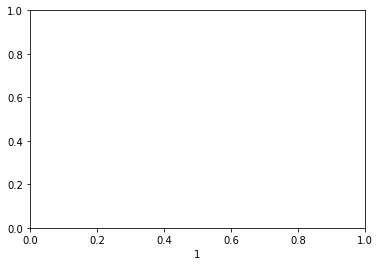

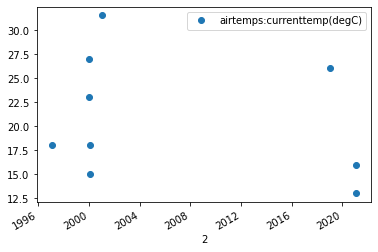

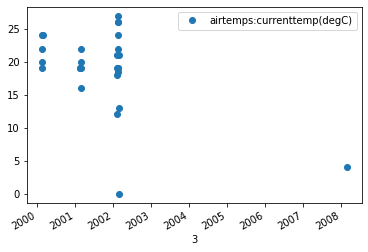

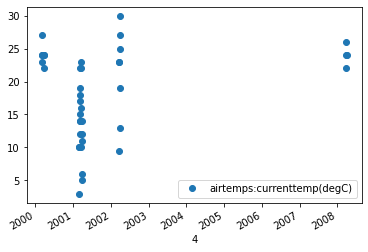

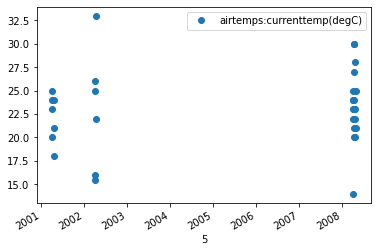

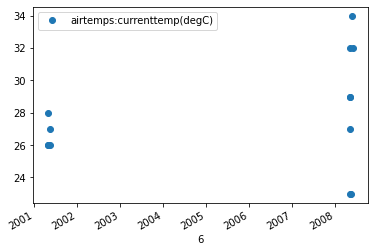

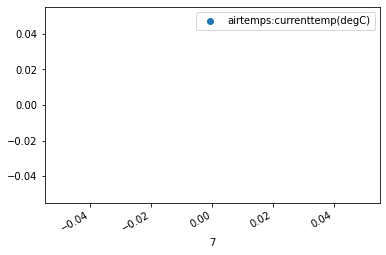

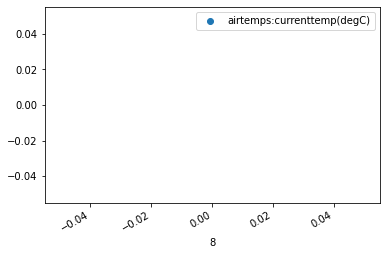

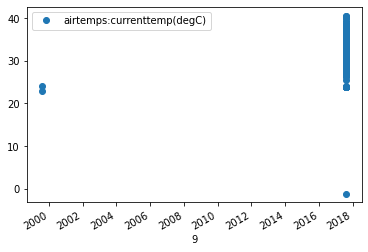

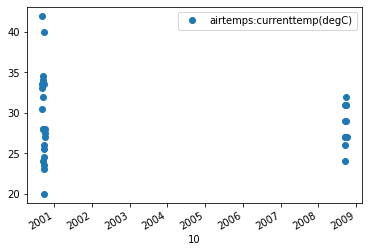

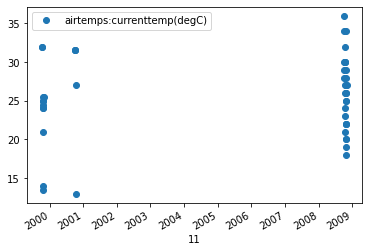

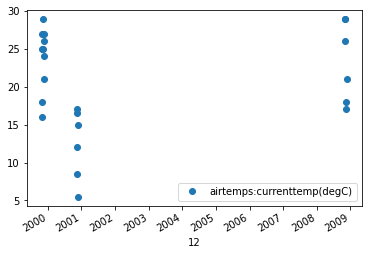

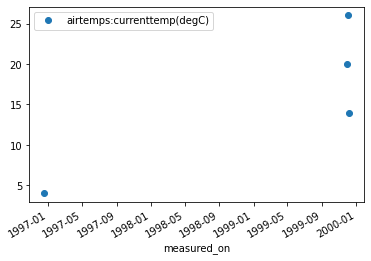

In [ ]:


for month in range(1,13):
    monthdf = tempdf[tempdf.measured_on.dt.month == month]
    plt.xlabel(month)
    monthdf.plot(x='measured_on', y='airtemps:currenttemp(degC)', style = 'o')


#atemp.info()

**graph 1 findings** (temperature by month over 20 years)
1. sparse and lacking data, unable to make definite conclusions (no data for some months??)
2. months 3,4,5,8,10,12 show a noticeable increase in median temperature over the years (spring and early autumn)
3. months 1,2,9(?) show a decrease in median temperature
4. other temperatures seem constant over 20 years
5. no alarming changes, inconclusive data



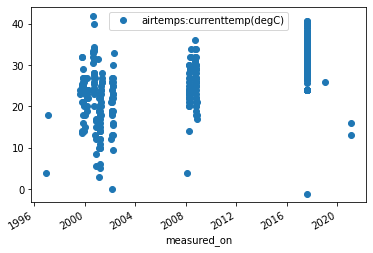

In [ ]:

atemp['airtemps:currenttemp(degC)'] = pd.to_numeric(atemp['airtemps:currenttemp(degC)'])
atemp.plot(x='measured_on', y='airtemps:currenttemp(degC)', style = 'o')

#atemp.info()

**graph 2 findings** (temperature over 20 years)
1. lacking consistent data, clumps of data in 10 year intervals
2. steady, significant increase (~10ºC) in median yearly temperature (or median of clumps) – confirm these changes manually
3. demonstrates UHIE
4. max temperature over 20 years occurs at around 2002, but is an outlier. consistent max temperature occurs around 2018
5. min temperature occurs around 2018, but is an outlier. consistent max temp occurs around 2000. 


geofence austin using lat/long (done)
get all the rows with austin (done)
public data on austin urban growth over the past 20 years

**get austin sunset data from somewhere** (ask)

**GRAPHS**
graph 1: 

1. average temperature by season over 20 years
2. scatter plot of temperature data over 20 years (note max temperature over 20 years)

with sunrise/sunset data
3. find avg daytime/nighttime temps by season
4. max daytime/nighttime temps by season

with urban density data - to model 
5. plot urban density over the last 20 years - plotting urban built up area over time 


[https://towardsdatascience.com/getting-weather-data-in-3-easy-steps-8dc10cc5c859] 


austin: greater than: 60 x 70
0.5 degree = 30 mi

center + 30 mi all directions = center + 0.5 degree in all directions

austin center: (30.266666,-97.733330)

bottom left: (30.162936443235168, -97.91751762002117)
top left: (30.48897, -97.81071)
top right: (30.44518, -97.65416)
bottom right: (30.16069, -97.62447)

use lat: 30.1 to 30.5 
long: -98.0 to -97.5

try: 30.0-31.0
long: -98.0-97.0
